<a href="https://colab.research.google.com/github/kushal-h/Deep-Learning-Implementations/blob/master/CNN/Plant_disease_detection_for_38_class_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# @Author: Kushal H

In [ ]:
from google.colab import files

files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

100% 2.03G/2.04G [00:23<00:00, 85.8MB/s]
100% 2.04G/2.04G [00:23<00:00, 92.6MB/s]


In [ ]:
!unzip /content/plantvillage-dataset.zip

Installing folder split library

In [ ]:
!pip install split-folders

Splitting the data into test and training dataset

In [ ]:
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.9, .1)`.
splitfolders.ratio('/content/plantvillage dataset/segmented', output="out", seed=1337, ratio=(0.9, 0.1),
                   group_prefix=None) # default values

Copying files: 54306 files [00:10, 5145.56 files/s]


In [ ]:
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation
from tensorflow.keras.models import Sequential
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt

In [ ]:
train_data_dir = '/content/out/train'
val_data_dir = '/content/out/val'

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
     rescale=1./255,
     rotation_range=30,
     width_shift_range=0.3,
     height_shift_range=0.3,
     horizontal_flip=True,
     fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(227,227),
    batch_size=128,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
      val_data_dir,
      target_size=(227,227),
      batch_size=128,
      class_mode='categorical')

Found 48858 images belonging to 38 classes.
Found 5448 images belonging to 38 classes.


In [ ]:
validation_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
validation_generator.class_indices

Building the CNN model (AlexNet)

In [ ]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(38,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 384)         8

Compile the defined CNN model

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Creating checkpoint to save the model

In [ ]:
model_check_point = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Agridoc model/Alexnet_227x227.h5', 
                                                      monitor = 'val_loss',
                                                      verbose = 1, 
                                                      save_best_only= True)

In [ ]:
callbacks = [model_check_point]

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks = callbacks)

Epoch 1/10
382/382 [==============================] - 4764s 12s/step - loss: 2.1857 - accuracy: 0.3943 - val_loss: 2.9971 - val_accuracy: 0.3860

Epoch 00001: val_loss improved from inf to 2.99715, saving model to /content/drive/MyDrive/Agridoc model/Alexnet_227x227.h5
Epoch 2/10
382/382 [==============================] - 4743s 12s/step - loss: 1.3187 - accuracy: 0.5950 - val_loss: 1.8697 - val_accuracy: 0.4998

Epoch 00002: val_loss improved from 2.99715 to 1.86974, saving model to /content/drive/MyDrive/Agridoc model/Alexnet_227x227.h5
Epoch 3/10
382/382 [==============================] - 4672s 12s/step - loss: 0.9642 - accuracy: 0.6976 - val_loss: 1.6514 - val_accuracy: 0.5764

Epoch 00003: val_loss improved from 1.86974 to 1.65145, saving model to /content/drive/MyDrive/Agridoc model/Alexnet_227x227.h5
Epoch 4/10
382/382 [==============================] - 4673s 12s/step - loss: 0.7626 - accuracy: 0.7562 - val_loss: 1.6526 - val_accuracy: 0.5633

Epoch 00004: val_loss did not improv

In [ ]:
model2 = tf.keras.models.load_model("/content/drive/MyDrive/Agridoc model//Alexnet_127x127.h5")

In [ ]:
model2.evaluate(validation_generator)

43/43 [==============================] - 127s 3s/step - loss: 0.9334 - accuracy: 0.7388


[0.9333643913269043, 0.7388032078742981]

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 384)        

In [ ]:
validation_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

Retrain after 6 epoch

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Agridoc model//Alexnet_227x227.h5")

In [ ]:
model.evaluate(validation_generator)

43/43 [==============================] - 123s 3s/step - loss: 0.6921 - accuracy: 0.7915


[0.6920990347862244, 0.7914831042289734]

In [ ]:
model_check_point = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Agridoc model/Alexnet_227x227.h5', 
                                                      monitor = 'val_loss',
                                                      verbose = 1, 
                                                      save_best_only= True)

In [ ]:
callbacks = [model_check_point]

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks = callbacks, initial_epoch=6)

Epoch 7/10
382/382 [==============================] - 4522s 12s/step - loss: 0.5635 - accuracy: 0.8194 - val_loss: 1.1663 - val_accuracy: 0.6953

Epoch 00007: val_loss improved from inf to 1.16625, saving model to /content/drive/MyDrive/Agridoc model/Alexnet_227x227.h5
Epoch 8/10
382/382 [==============================] - 4445s 12s/step - loss: 0.5034 - accuracy: 0.8386 - val_loss: 0.4998 - val_accuracy: 0.8552

Epoch 00008: val_loss improved from 1.16625 to 0.49982, saving model to /content/drive/MyDrive/Agridoc model/Alexnet_227x227.h5
Epoch 9/10
382/382 [==============================] - 4411s 12s/step - loss: 0.4449 - accuracy: 0.8551 - val_loss: 1.2558 - val_accuracy: 0.6986

Epoch 00009: val_loss did not improve from 0.49982
Epoch 10/10
382/382 [==============================] - 4445s 12s/step - loss: 0.3992 - accuracy: 0.8714 - val_loss: 0.9900 - val_accuracy: 0.7520

Epoch 00010: val_loss did not improve from 0.49982


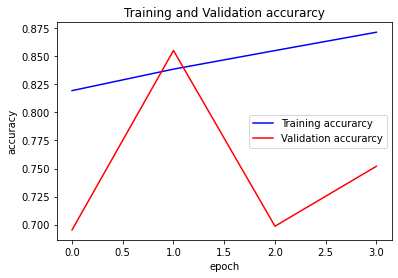

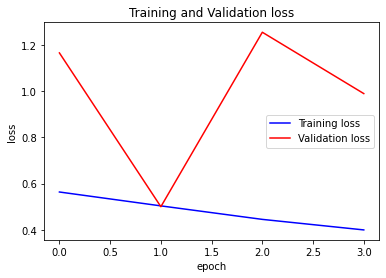

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#Train and validation accuracy
plt.plot( acc, 'b', label='Training accurarcy')
plt.plot( val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot( loss, 'b', label='Training loss')
plt.plot( val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
43/43 [==============================] - 121s 3s/step - loss: 0.9900 - accuracy: 0.7520
Test Accuracy: 75.20191073417664


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


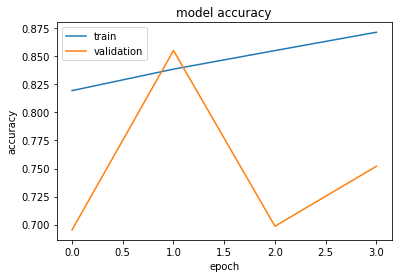

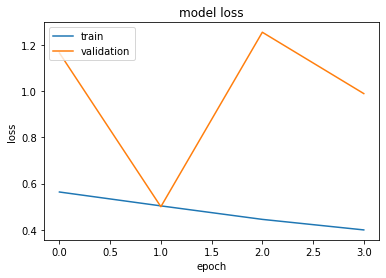

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Loading model

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Agridoc model/Alexnet_227x227.h5")


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
43/43 [==============================] - 106s 2s/step - loss: 0.4998 - accuracy: 0.8552
Test Accuracy: 85.51762104034424


In [ ]:
model1 = tf.keras.models.load_model("/content/drive/MyDrive/Agridoc model/Alexnet_227x227_new.h5")


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model1.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
43/43 [==============================] - 120s 3s/step - loss: 0.9759 - accuracy: 0.7109
Test Accuracy: 71.09031081199646


In [ ]:
model2 = tf.keras.models.load_model("/content/drive/MyDrive/Agridoc model/Alexnet_227x227_newupdate.h5")


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model2.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
43/43 [==============================] - 119s 3s/step - loss: 0.2230 - accuracy: 0.9246
Test Accuracy: 92.4559473991394


In [ ]:
model3 = tf.keras.models.load_model("/content/drive/MyDrive/Agridoc model/Alexnet_227x227_newupdate2.h5")


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model3.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
43/43 [==============================] - 119s 3s/step - loss: 0.4006 - accuracy: 0.8959
Test Accuracy: 89.59251046180725


Model's accuracy

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

In [ ]:
model_check_point = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Agridoc model/Alexnet_227x227.h5', 
                                                      monitor = 'val_loss',
                                                      verbose = 1, 
                                                      save_best_only= True)

In [ ]:
callbacks = [model_check_point]

In [ ]:
history = model.fit(train_generator, epochs=25, validation_data=validation_generator, callbacks = callbacks, initial_epoch=10)

Epoch 7/10
382/382 [==============================] - 4522s 12s/step - loss: 0.5635 - accuracy: 0.8194 - val_loss: 1.1663 - val_accuracy: 0.6953

Epoch 00007: val_loss improved from inf to 1.16625, saving model to /content/drive/MyDrive/Agridoc model/Alexnet_227x227.h5
Epoch 8/10
382/382 [==============================] - 4445s 12s/step - loss: 0.5034 - accuracy: 0.8386 - val_loss: 0.4998 - val_accuracy: 0.8552

Epoch 00008: val_loss improved from 1.16625 to 0.49982, saving model to /content/drive/MyDrive/Agridoc model/Alexnet_227x227.h5
Epoch 9/10
382/382 [==============================] - 4411s 12s/step - loss: 0.4449 - accuracy: 0.8551 - val_loss: 1.2558 - val_accuracy: 0.6986

Epoch 00009: val_loss did not improve from 0.49982
Epoch 10/10
382/382 [==============================] - 4445s 12s/step - loss: 0.3992 - accuracy: 0.8714 - val_loss: 0.9900 - val_accuracy: 0.7520

Epoch 00010: val_loss did not improve from 0.49982


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#Train and validation accuracy
plt.plot( acc, 'b', label='Training accurarcy')
plt.plot( val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot( loss, 'b', label='Training loss')
plt.plot( val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()